In [12]:
import os
from src.configs import set_defaults
from src.transforms import AddNoise, TimeShifting, TimeScaling
from src.load import load_data
from src.utils import get_noise_files
import matplotlib.pyplot as plt
import IPython.display as ipd

In [13]:
args = set_defaults()

args.data_root = '../Paper/1/Arabic_Speech_Commands_Dataset'
class_name = 'rotate'
file_name = '00000020_NO_07.wav'
signal_samples = args.signal_len * args.signal_sr

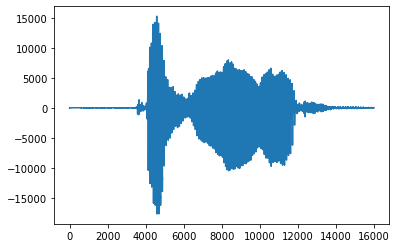

In [14]:
signal = load_data(class_name, file_name, signal_samples, args.data_root, args.signal_sr)
plt.plot(signal)
ipd.Audio(signal, rate=args.signal_sr)

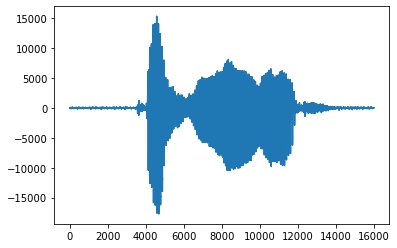

In [15]:
bkg_noise_path = os.path.join(args.data_root, 'background_noise')
noise_files, noise_probability_distribution = get_noise_files(bkg_noise_path, args.signal_sr)

add_noise = AddNoise(noise_files, noise_probability_distribution, args.noise_vol,
                     signal_samples, args.data_root, args.signal_sr)

noisy_signal = add_noise(signal)
plt.plot(noisy_signal)
ipd.Audio(noisy_signal, rate=args.signal_sr)

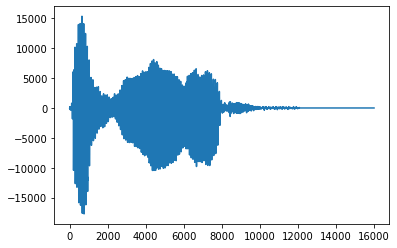

In [16]:
time_shifting = TimeShifting(args.shift_min, args.shift_max)
shifted_signal = time_shifting(noisy_signal)

plt.plot(shifted_signal)
ipd.Audio(shifted_signal, rate=args.signal_sr)

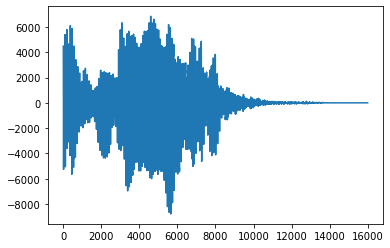

In [17]:
time_scaling = TimeScaling(args.scale_min, args.scale_max)
scaled_signal = time_scaling(shifted_signal)

plt.plot(scaled_signal)
ipd.Audio(scaled_signal, rate=args.signal_sr)